In [1]:
import json
from mpl_toolkits import mplot3d

%matplotlib inline
import matplotlib.pyplot as plt

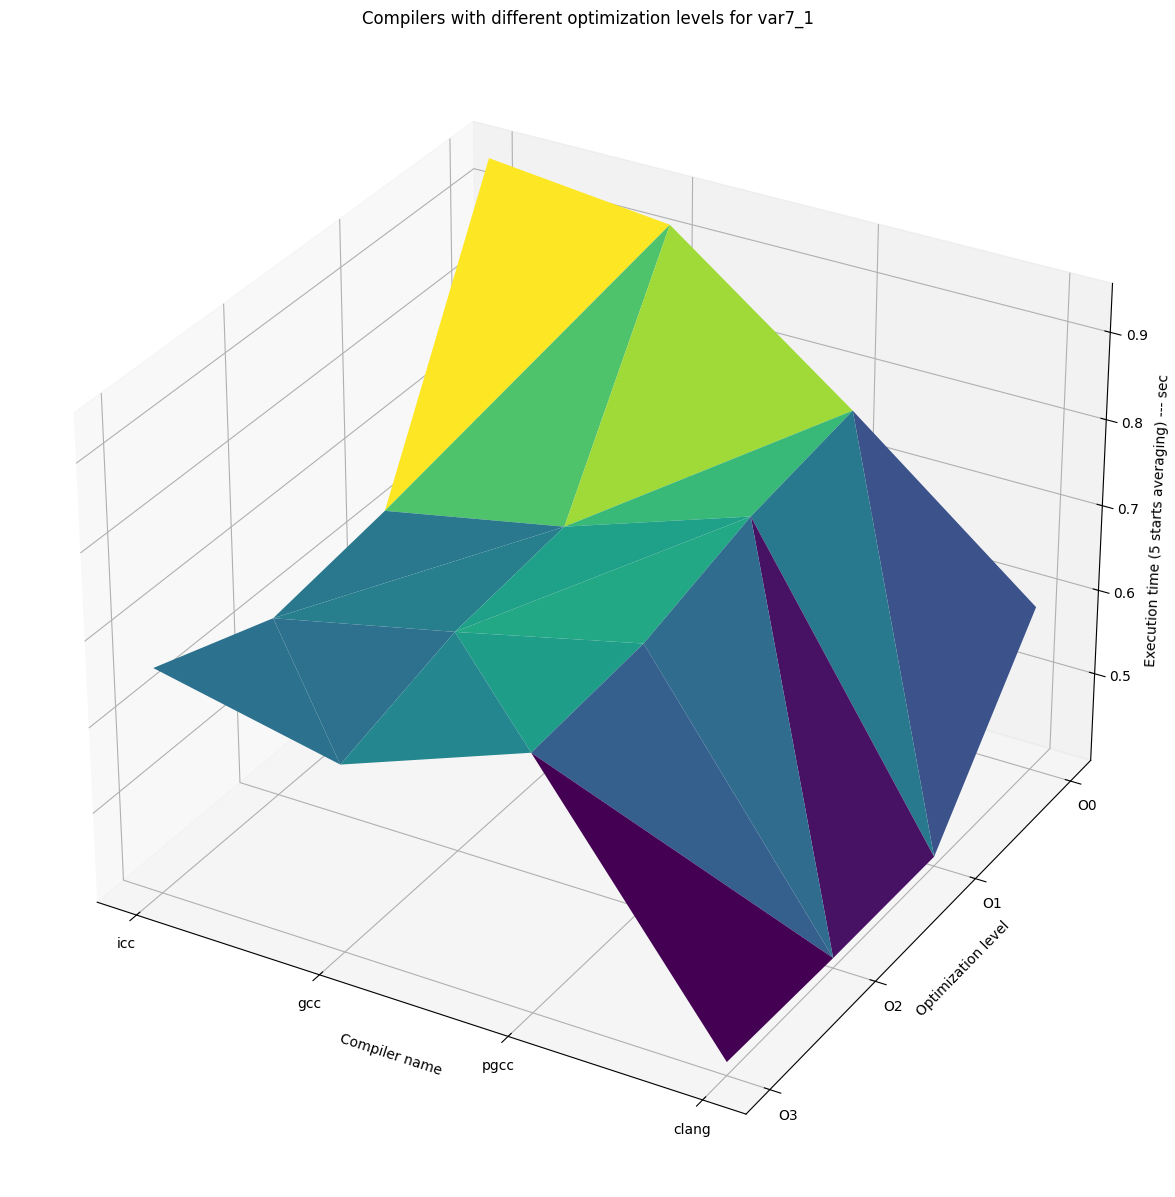

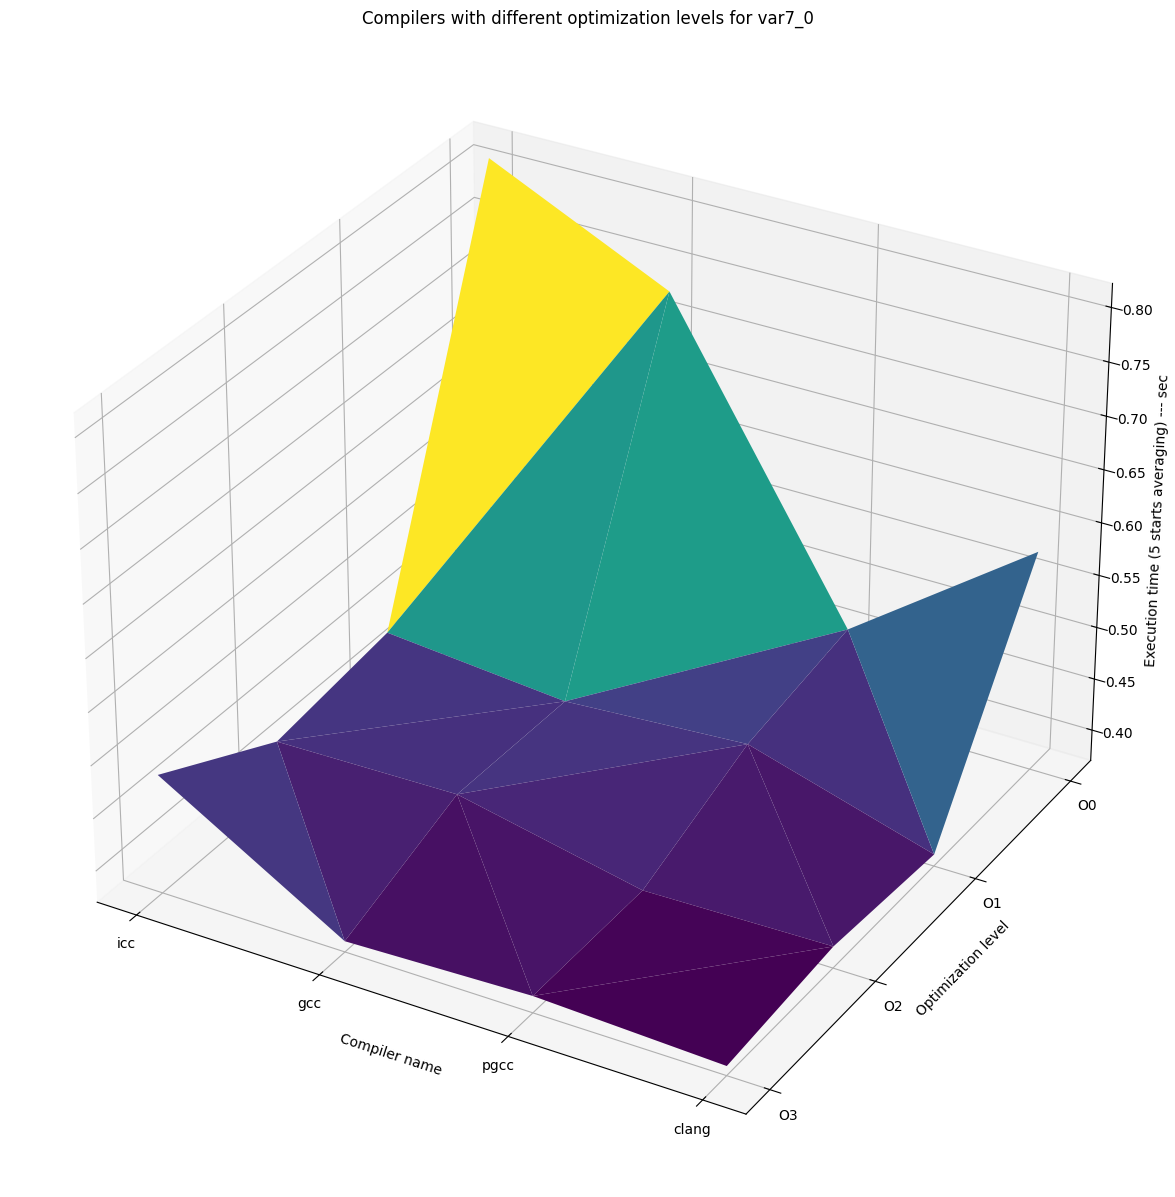

In [15]:
# read data for diff compilers plot
with open("diff_compiler_opt.json") as fp:
    diff_compiler_opt = json.load(fp)

for prog_name, prog_data in diff_compiler_opt.items():
    # init plot
    plt.figure(figsize=(15, 15))
    ax = plt.axes(projection='3d')
    plt.title(f'Compilers with different optimization levels for {prog_name}')

    # store data
    x, y, z = [], [], []
    compilers = list(prog_data.keys())
    optimizers = list(prog_data[compilers[0]].keys())
    for compiler_num, optimizers_values in enumerate(prog_data.values()):
        for optimizer_num, value in enumerate(optimizers_values.values()):
            x.append(compiler_num)
            y.append(optimizer_num)
            z.append(value)

    ax.set_xlabel('Compiler name')
    ax.set_ylabel('Optimization level')
    ax.set_zlabel('Execution time (5 starts averaging) --- sec')
    
    ax.set_xticks(list(range(len(compilers))), labels=compilers)
    ax.set_yticks(list(range(len(optimizers))), labels=optimizers)

    ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')

    plt.savefig(f'images/compilers_opt_for_{prog_name}.png')

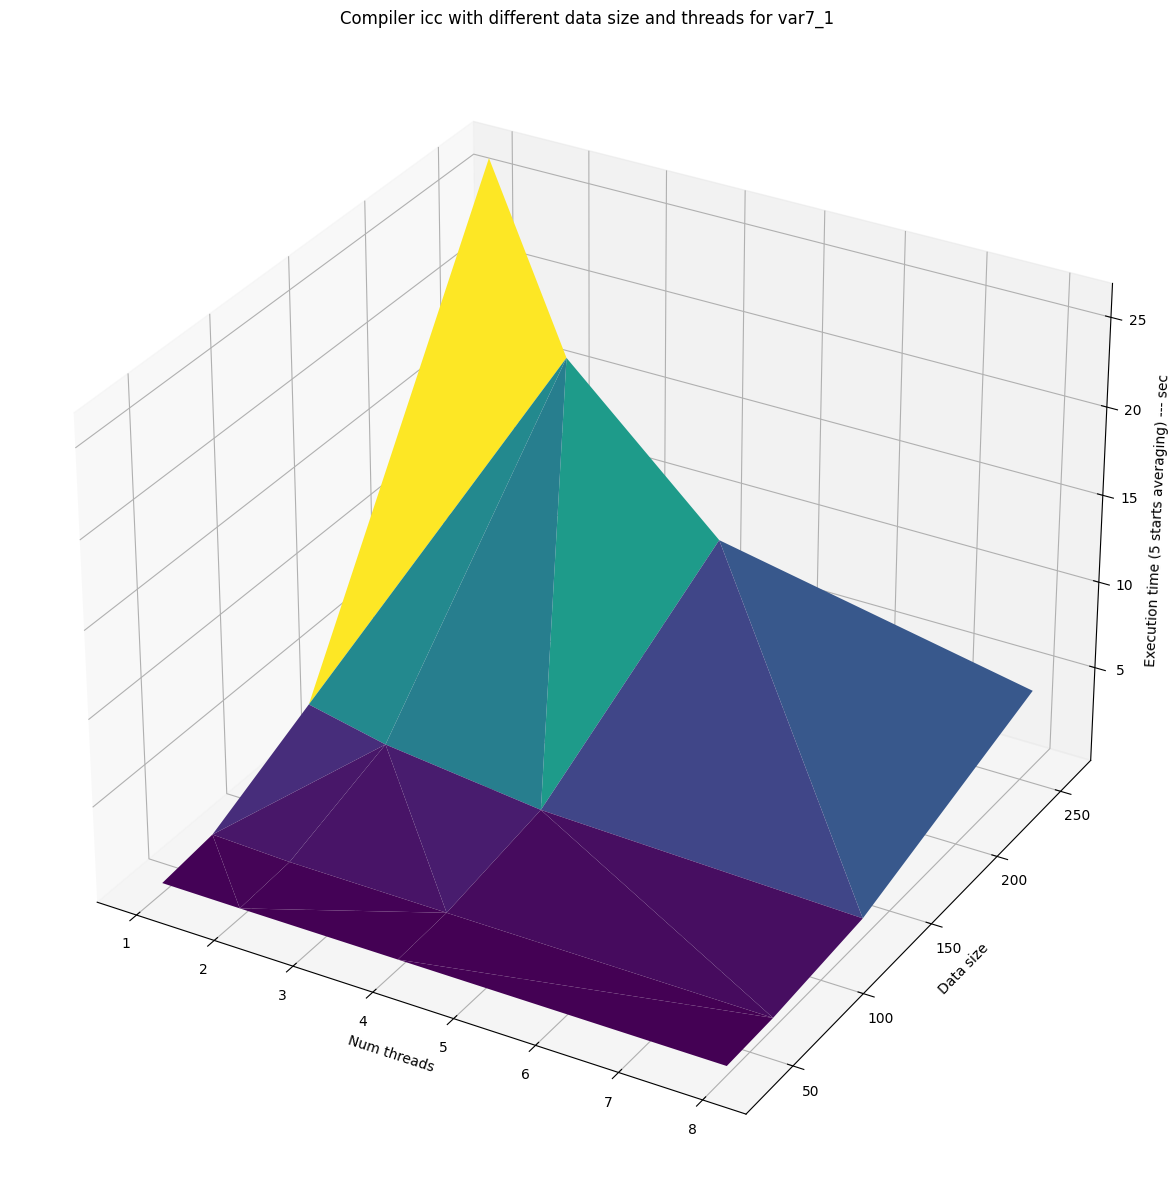

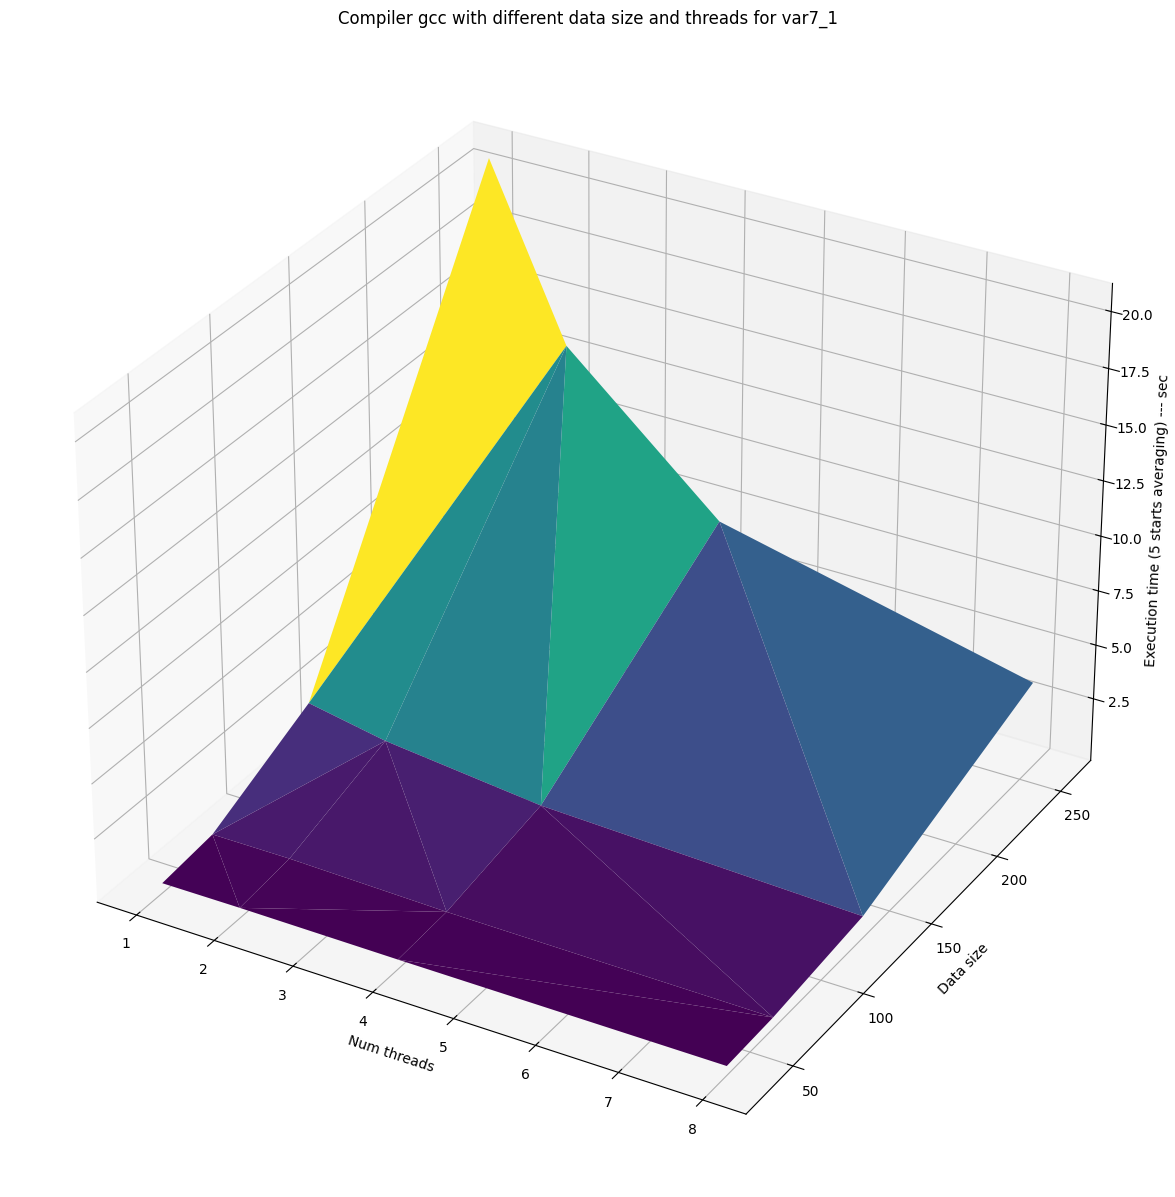

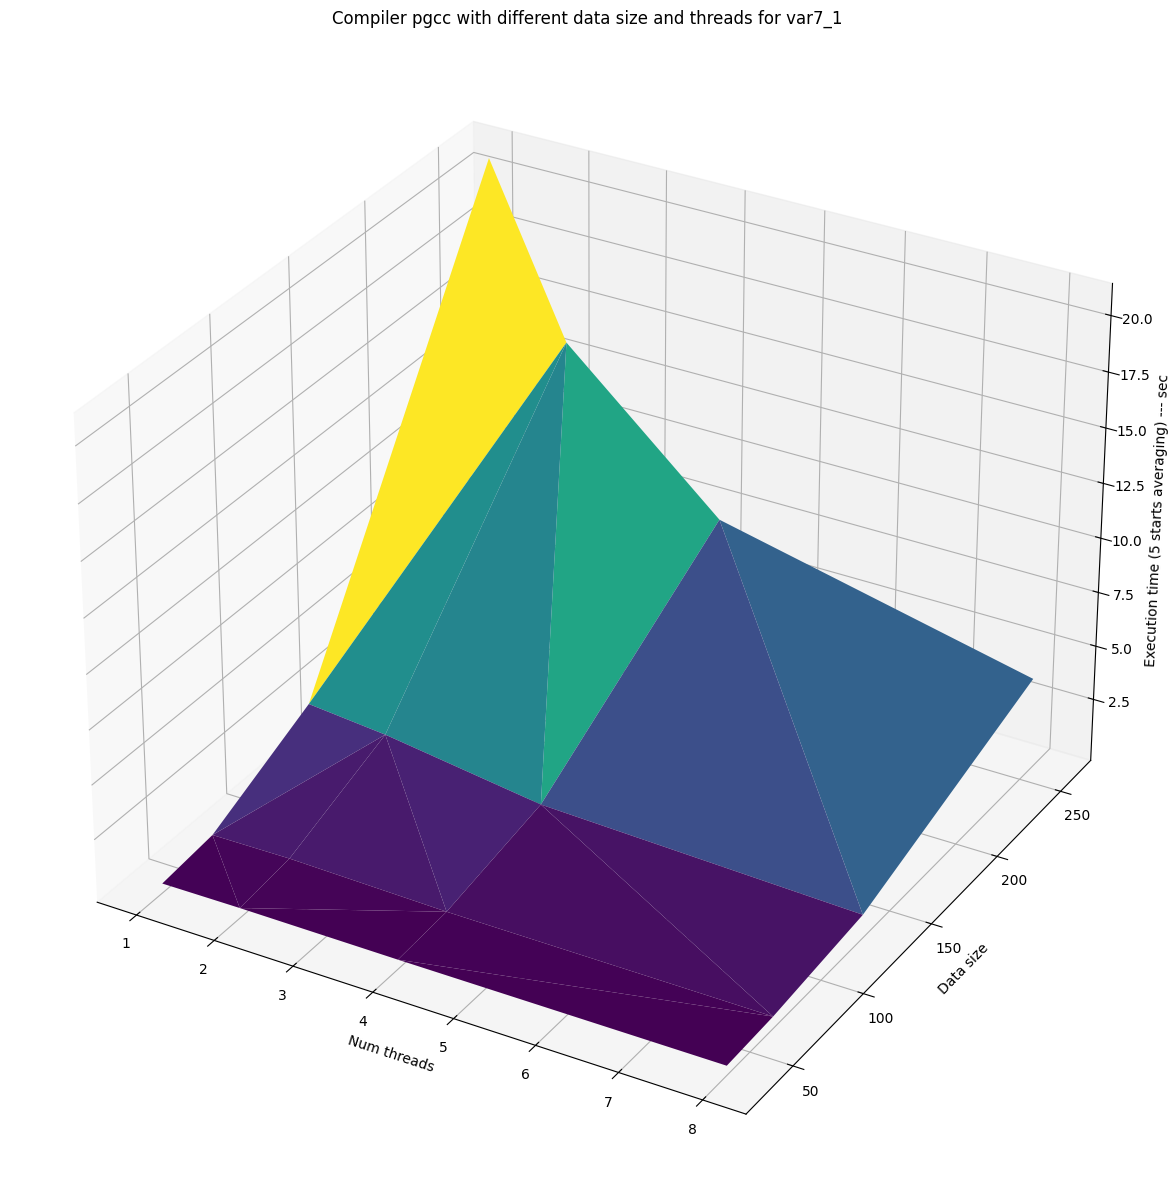

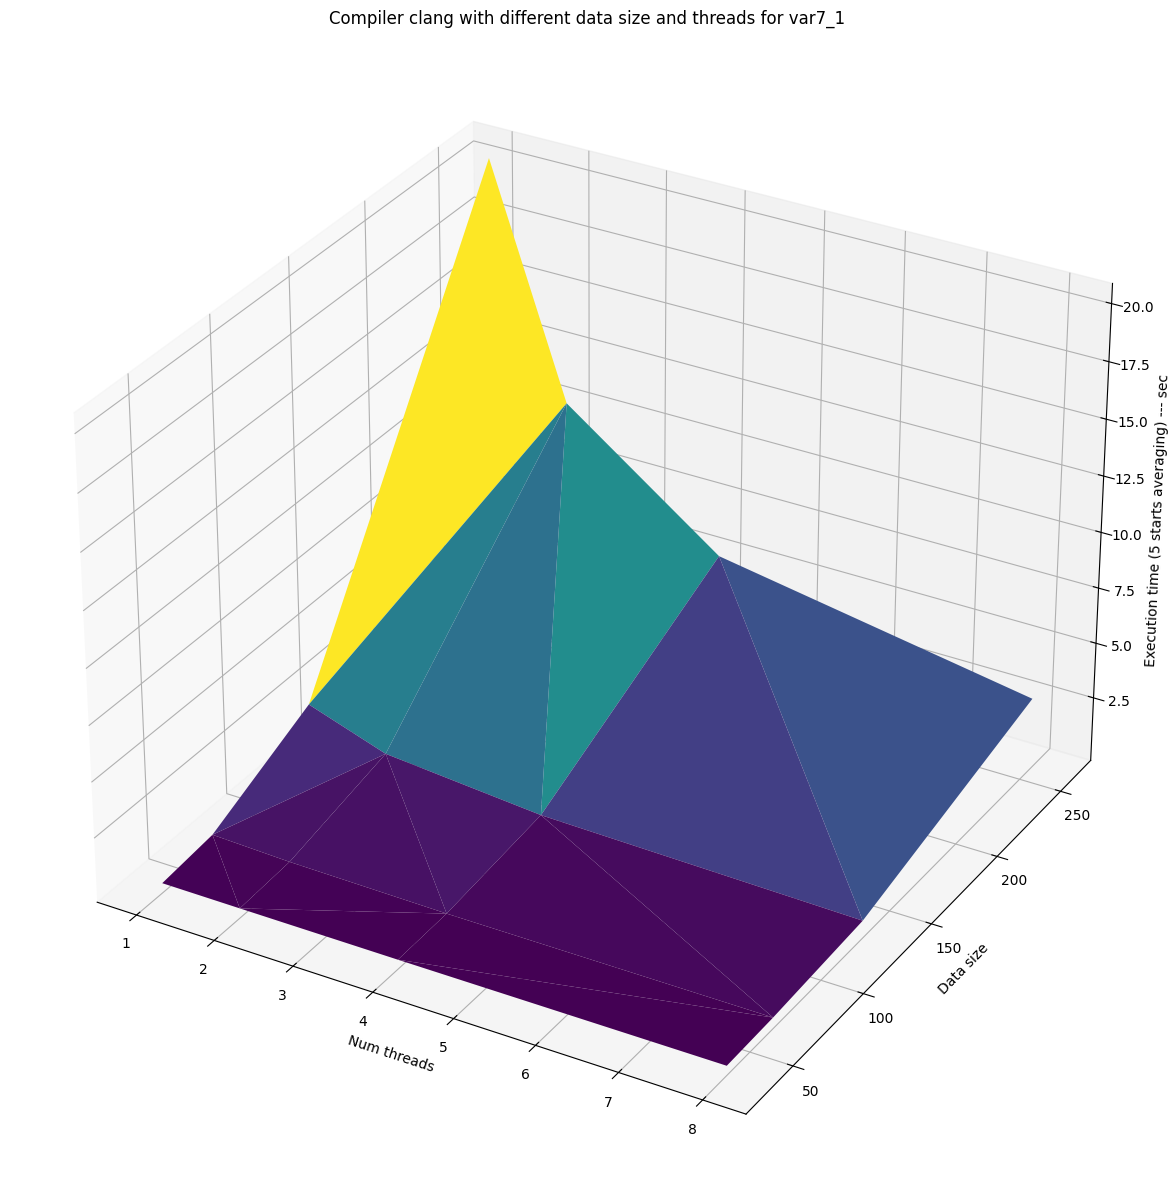

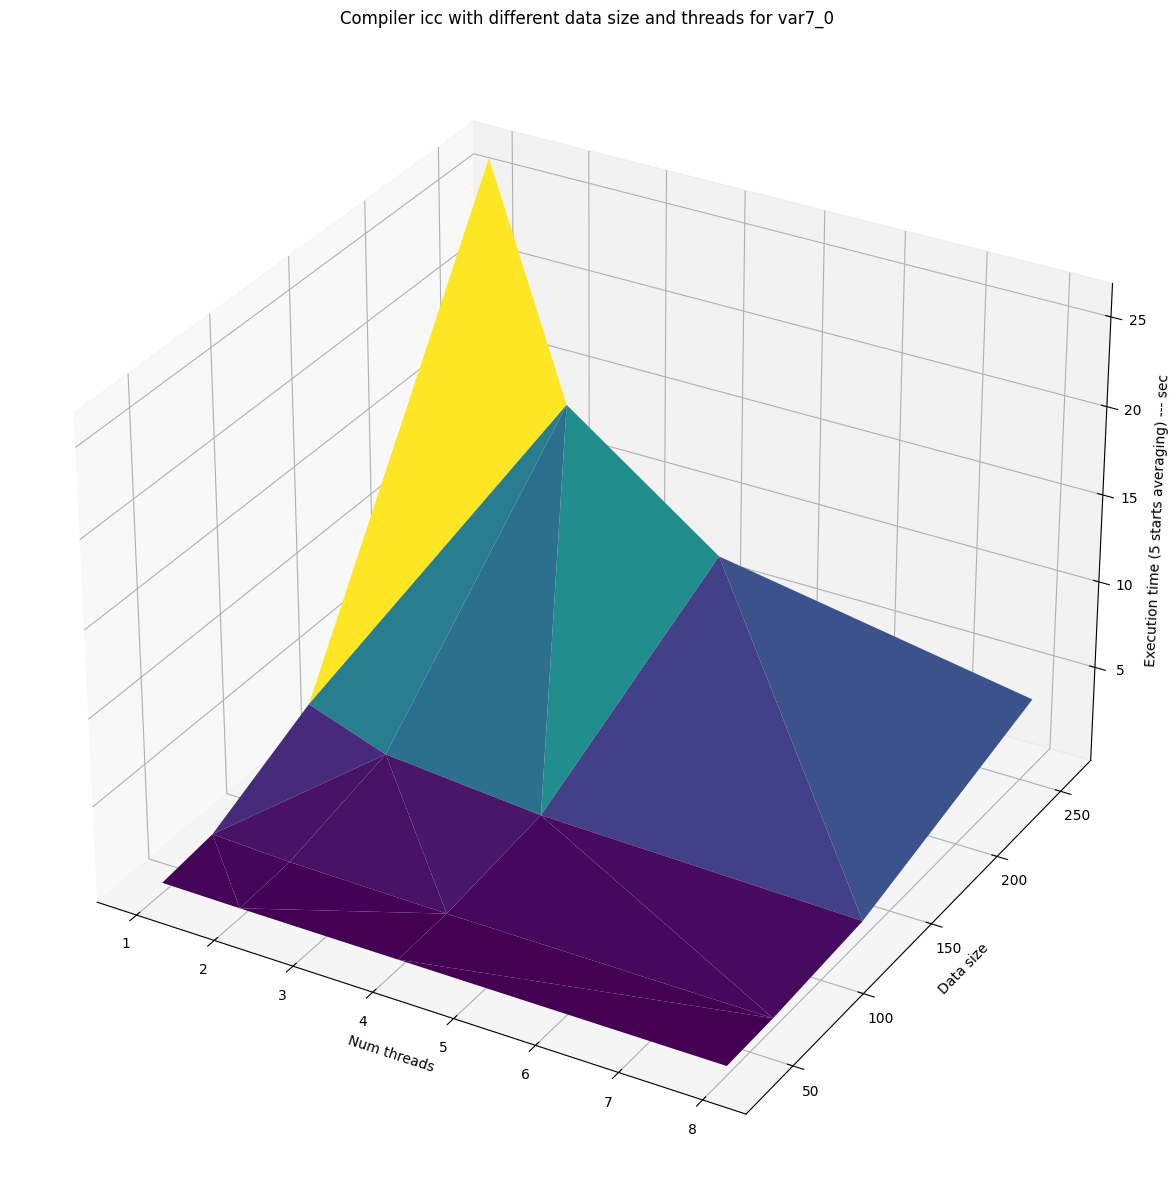

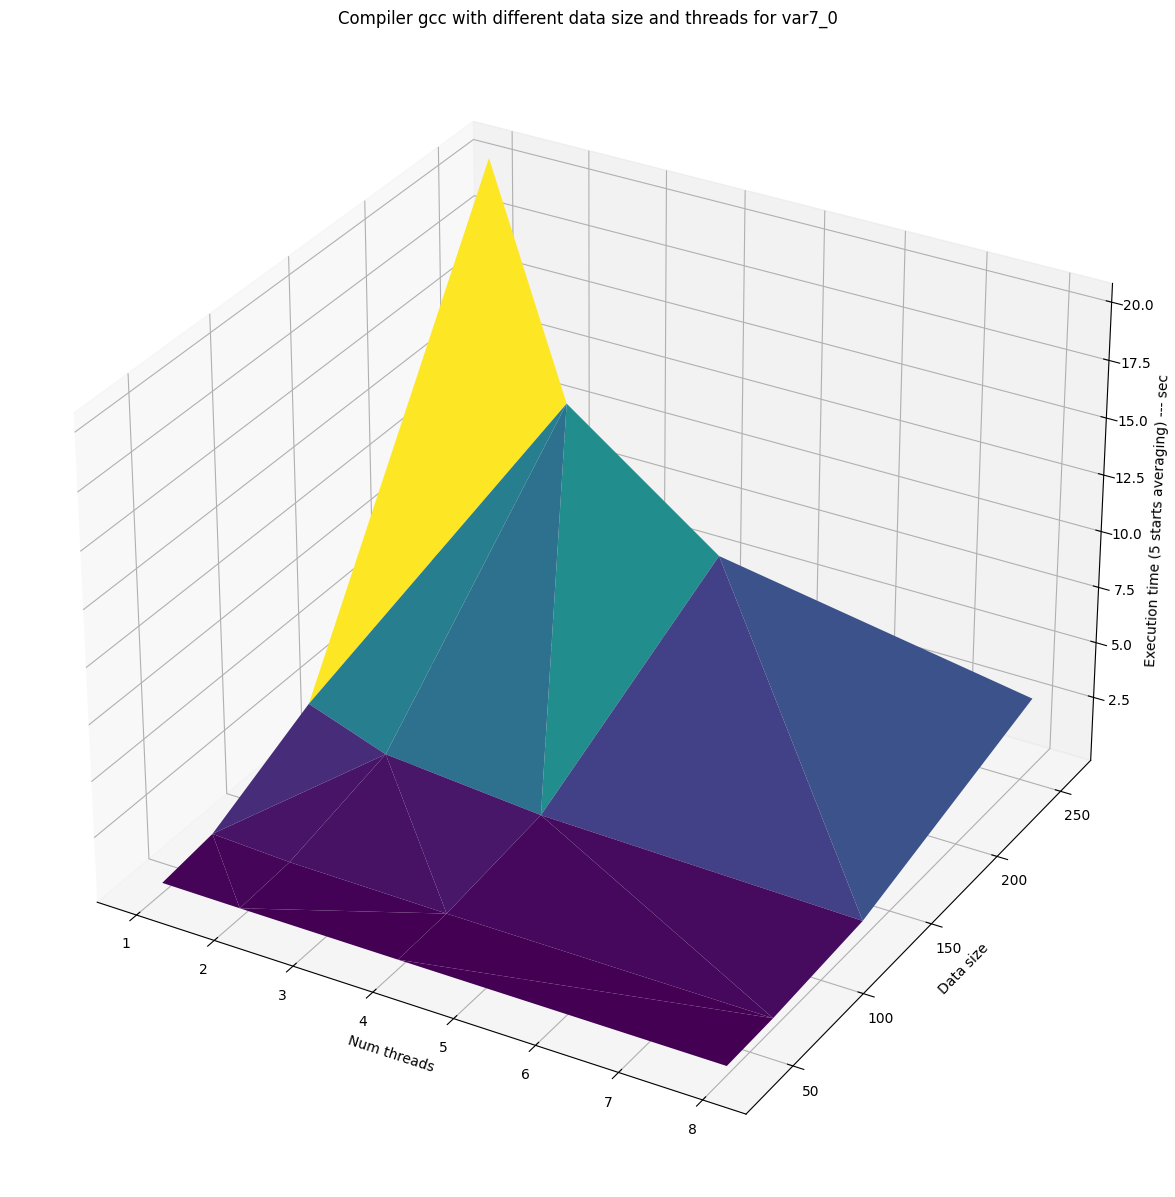

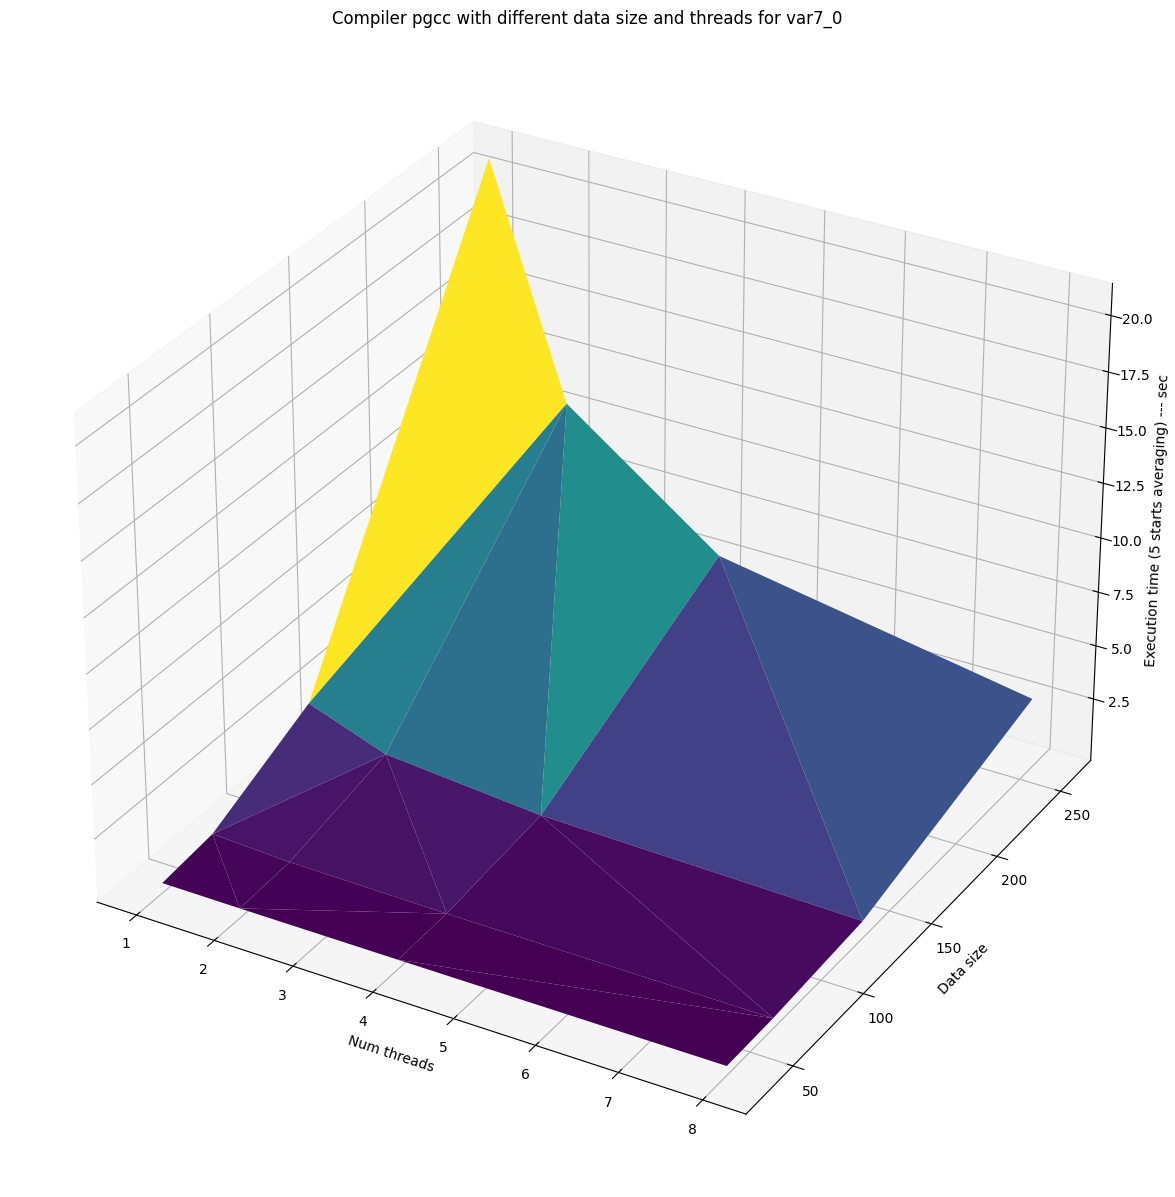

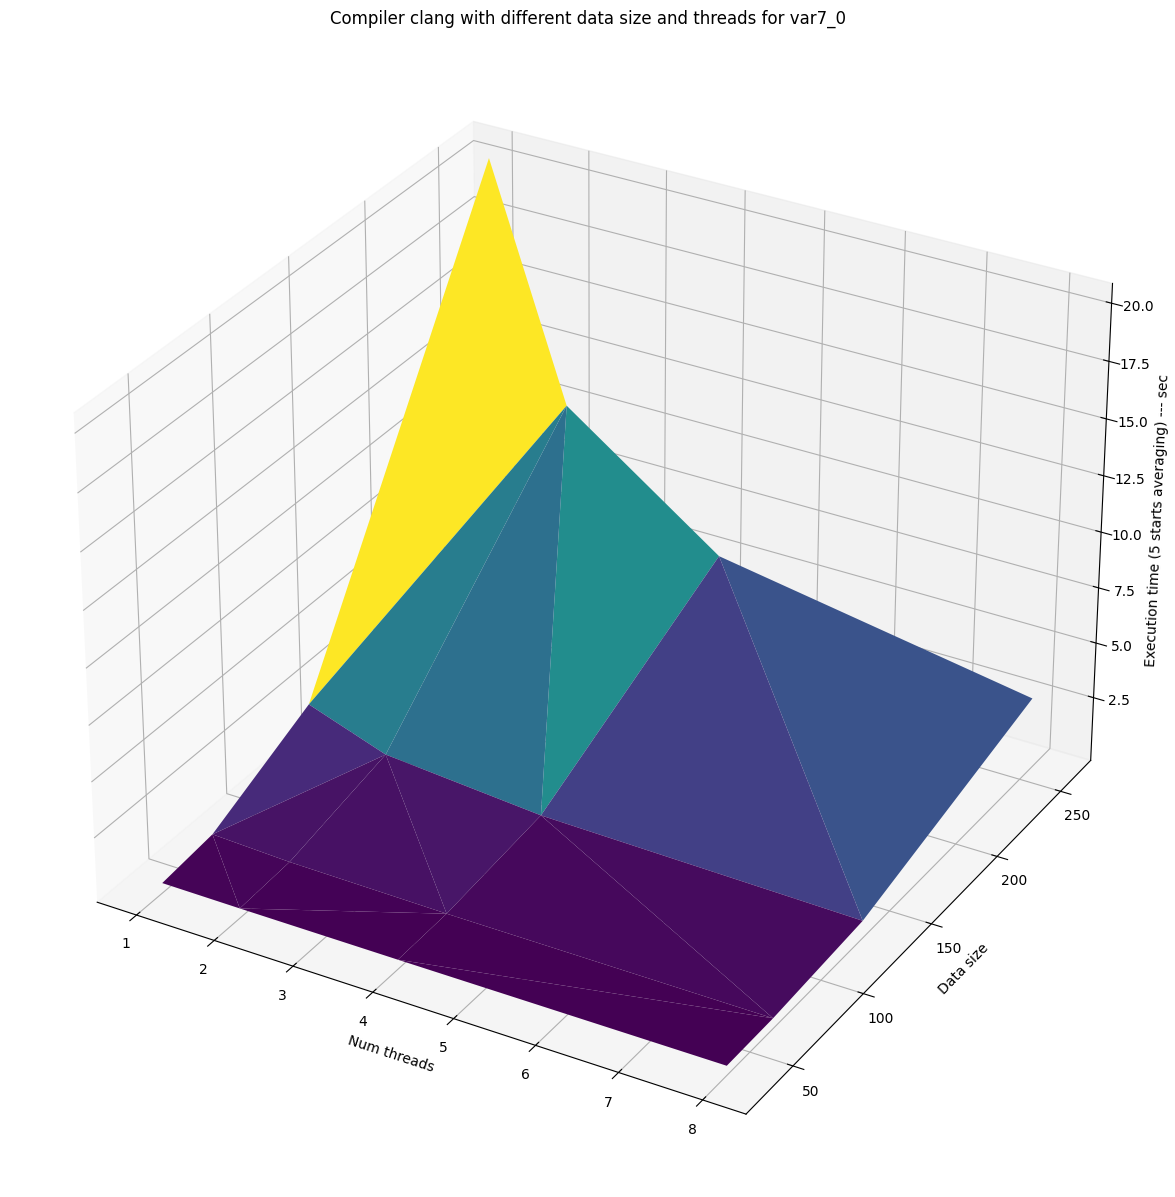

In [17]:
# read data for diff data plot
with open("diff_data.json") as fp:
    diff_data = json.load(fp)

for prog_name, prog_data in diff_data.items():
    for compiler_name, compiler_data in prog_data.items():
        # init plot
        plt.figure(figsize=(15, 15))
        ax = plt.axes(projection='3d')
        plt.title(f'Compiler {compiler_name} with different data size and threads for {prog_name}')

        # store data
        x, y, z = [], [], []
        for data_size, data_sizes_data in compiler_data.items():
            for num_threads, value in data_sizes_data.items():
                x.append(int(num_threads))
                y.append(int(data_size))
                z.append(value)

        ax.set_xlabel('Num threads')
        ax.set_ylabel('Data size')
        ax.set_zlabel('Execution time (5 starts averaging) --- sec')

        ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')

        plt.savefig(f'images/diff_data_for_{prog_name}_with_{compiler_name}.png')